# Nickel (Magnetic Bench)

[0.075 0.105 0.15  0.195 0.21  0.24  0.27  0.315 0.39  0.42  0.48  0.555
 0.66  0.735 0.855 0.975 1.02  1.035 1.185]


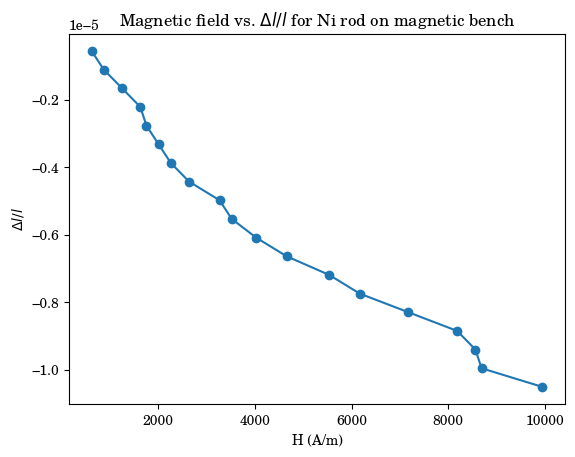

In [15]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Read the data
df = pd.read_excel('/home/peakcipher/Documents/NISER/8. 2023 Spring/P442 Integrated Physics Lab II/p442-integrated-lab/III. Magnetostriction/data/mb-Ni.xlsx')
data = df.to_numpy()

# Create a random numpy array
x_min = 0
x_max = 1.2
mask = (data[:, 1] >= x_min) & (data[:, 1] <= x_max)


# Number of coils
N = 1200

# length of rods
l_NI = 14.3*1e-2 # m
l_Fe = 14.27*1e-2 # m
l_Cu = 14.2*1e-2 # m



# Find all local maxima
max_indices, _ = find_peaks(data[:, 2][mask])

# Find all local minima
min_indices, _ = find_peaks(-data[:, 2][mask])

# Adjust the indices to account for the x-limits
max_indices = np.where(mask)[0][max_indices]
min_indices = np.where(mask)[0][min_indices]

# Extracting x_values (current)
x_max_values = data[max_indices, 1]
x_min_values = data[min_indices, 1]
x_values = np.concatenate((x_max_values, x_min_values))
current_values = np.sort(x_values)
print(current_values)
# n values
ap_values = np.zeros(len(current_values))
for i in range(len(current_values)):
    ap_values[i] = 0.5*(i+1)

# delta_l values
delta_l = -ap_values*632.8/4*1e-9

# magnetic field values (H)
H_values = N*current_values/l_NI

# delta_l/l values
delta_l_l = delta_l/l_NI

# # Interpolation for smooth curve
# x_smooth = np.linspace(H_values.min(), H_values.max(), 300)
# spl = make_interp_spline(H_values, delta_l_l)
# delta_l_l_smooth = spl(x_smooth)


# Plotting
#plt.plot(x_smooth, delta_l_l_smooth, '-', color='black')
plt.plot(H_values, delta_l_l, '-o')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['TeX Gyre Schola']
plt.xlabel('H (A/m)')
plt.ylabel('$\Delta l/l$')
plt.title('Magnetic field vs. $\Delta l/l$ for Ni rod on magnetic bench')
plt.savefig('mb-Ni-1.png', dpi=1200, bbox_inches='tight')
plt.show()


In [2]:
data_write = {'Current Values': current_values,
           'Ring changes': ap_values,
           'Delta l': delta_l,
           'H': H_values,
           'Delta l/l': delta_l_l}

df_write = pd.DataFrame(data_write)

# Stack the arrays horizontally
writer = pd.ExcelWriter('mb-Ni-tab.xlsx', engine='xlsxwriter')
df_write.to_excel(writer, sheet_name='Sheet1', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

/tmp/ipykernel_23427/1112353227.py:14: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


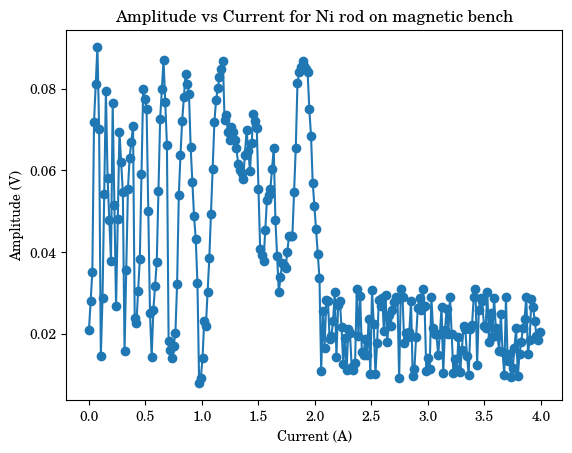

In [3]:
plt.plot(data[:, 1], data[:, 2], '-o')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['TeX Gyre Schola']
plt.xlabel('Current (A)')
plt.ylabel('Amplitude (V)')
plt.title('Amplitude vs Current for Ni rod on magnetic bench')
plt.savefig('mb-Ni-0.png', dpi=1200, bbox_inches='tight')
plt.show()

# Iron (Magnetic Bench)

[1.10629371e-06 1.65944056e-06 2.21258741e-06 1.65944056e-06
 1.10629371e-06 5.53146853e-07 0.00000000e+00] [4657.34265734 4783.21678322 5286.71328671 5538.46153846 5664.33566434
 5790.20979021 5916.08391608]


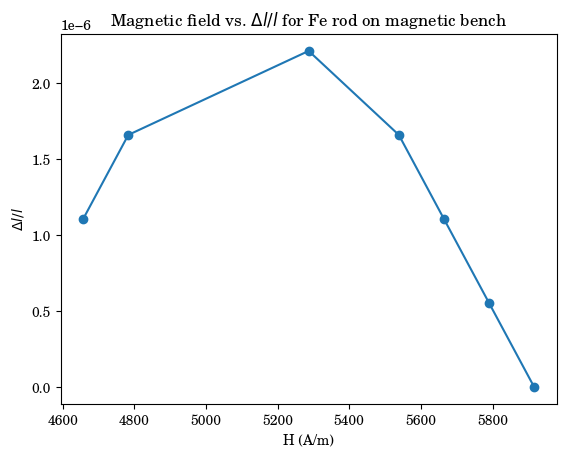

In [4]:
df = pd.read_excel('/home/peakcipher/Documents/NISER/8. 2023 Spring/P442 Integrated Physics Lab II/p442-integrated-lab/III. Magnetostriction/data/mb-Fe.xlsx')
data = df.to_numpy()
#print(data)
# Create a random numpy array
x_min = 0.4
x_max = 0.8
mask = (data[:, 1] >= x_min) & (data[:, 1] <= x_max)


# Number of coils
N = 1200

# length of rods
l_NI = 14.3*1e-2 # m
l_Fe = 14.27*1e-2 # m
l_Cu = 14.2*1e-2 # m



# Find all local maxima
max_indices, _ = find_peaks(data[:, 2][mask])

# Find all local minima
min_indices, _ = find_peaks(-data[:, 2][mask])

# Adjust the indices to account for the x-limits
max_indices = np.where(mask)[0][max_indices]
min_indices = np.where(mask)[0][min_indices]

# Extracting x_values (current)
x_max_values = data[max_indices, 1]
x_min_values = data[min_indices, 1]
x_values = np.concatenate((x_max_values, x_min_values))
current_values = np.sort(x_values)

# n values
ap_values = np.array([1, 1.5, 2, 1.5, 1.0, 0.5, 0.0])

# delta_l values
delta_l = ap_values*632.8/4*1e-9

# magnetic field values (H)
H_values = N*current_values/l_NI

# delta_l/l values
delta_l_l = delta_l/l_NI
print(delta_l_l, H_values)
# Plotting
plt.plot(H_values, delta_l_l, '-o')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['TeX Gyre Schola']
plt.xlabel('H (A/m)')
plt.ylabel('$\Delta l/l$')
plt.title('Magnetic field vs. $\Delta l/l$ for Fe rod on magnetic bench')
plt.savefig('mb-Fe-1.png', dpi=1200, bbox_inches='tight')
plt.show()

In [5]:
data_write = {'Current Values': current_values,
           'Ring changes': ap_values,
           'Delta l': delta_l,
           'H': H_values,
           'Delta l/l': delta_l_l}

df_write = pd.DataFrame(data_write)

# Stack the arrays horizontally
writer = pd.ExcelWriter('mb-Fe-tab.xlsx', engine='xlsxwriter')
df_write.to_excel(writer, sheet_name='Sheet1', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

/tmp/ipykernel_23427/1934750802.py:14: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


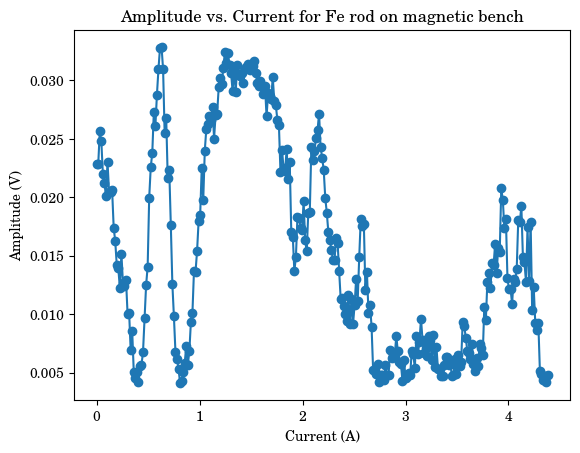

In [6]:
plt.plot(data[:, 1], data[:, 2], '-o')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['TeX Gyre Schola']
plt.xlabel('Current (A)')
plt.ylabel('Amplitude (V)')
plt.title('Amplitude vs. Current for Fe rod on magnetic bench')
plt.savefig('mb-Fe-0.png', dpi=1200, bbox_inches='tight')
plt.show()

# Cu (Magnetic bench)

In [7]:
df = pd.read_excel('/home/peakcipher/Documents/NISER/8. 2023 Spring/P442 Integrated Physics Lab II/p442-integrated-lab/III. Magnetostriction/data/mb-Cu.xlsx')
data = df.to_numpy()
#print(data)
# Create a random numpy array
x_min = 0
x_max = 3
mask = (data[:, 1] >= x_min) & (data[:, 1] <= x_max)


# Number of coils
N = 1200

# length of rods
l_NI = 14.3*1e-2 # m
l_Fe = 14.27*1e-2 # m
l_Cu = 14.2*1e-2 # m



# Find all local maxima
max_indices, _ = find_peaks(data[:, 2][mask])

# Find all local minima
min_indices, _ = find_peaks(-data[:, 2][mask])

# Adjust the indices to account for the x-limits
max_indices = np.where(mask)[0][max_indices]
min_indices = np.where(mask)[0][min_indices]

# Extracting x_values (current)
x_max_values = data[max_indices, 1]
x_min_values = data[min_indices, 1]
x_values = np.concatenate((x_max_values, x_min_values))
current_values = np.sort(x_values)

# n values
ap_values = np.zeros(len(current_values))
for i in range(len(current_values)):
    ap_values[i] = 0.5*(i+1)

# delta_l values
delta_l = -ap_values*632.8/4*1e-9

# magnetic field values (H)
H_values = N*current_values/l_NI

# delta_l/l values
delta_l_l = delta_l/l_NI

# Plotting
# plt.plot(H_values, delta_l_l, '-')
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['TeX Gyre Schola']
# plt.xlabel('H (A/m)')
# plt.ylabel('$\Delta l/l$')
# plt.title('Magnetic field vs. $\Delta l/l$ for Ni rod on magnetic bench')
# plt.show()

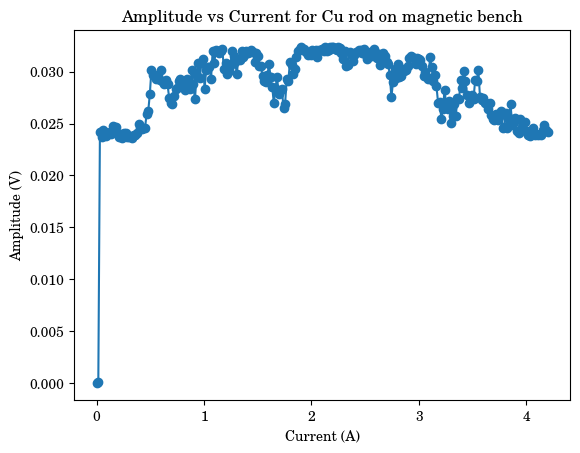

In [8]:
plt.plot(data[:, 1], data[:, 2], '-o')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['TeX Gyre Schola']
plt.xlabel('Current (A)')
plt.ylabel('Amplitude (V)')
plt.title('Amplitude vs Current for Cu rod on magnetic bench')
plt.savefig('mb-Cu-0.png', dpi=1200, bbox_inches='tight')
plt.show()

# Ni (Optical breadboard)

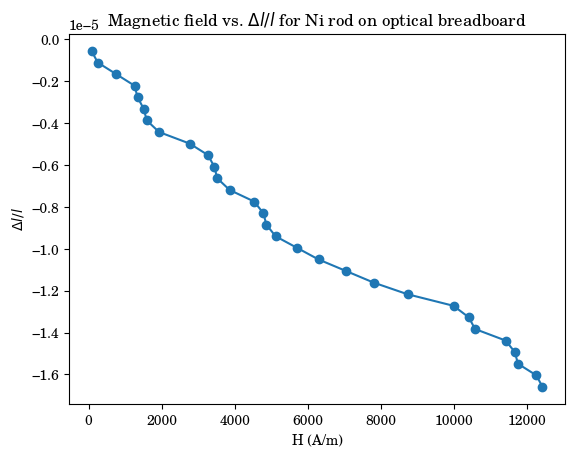

In [16]:
df = pd.read_excel('/home/peakcipher/Documents/NISER/8. 2023 Spring/P442 Integrated Physics Lab II/p442-integrated-lab/III. Magnetostriction/data/ob-Ni.xlsx')
data = df.to_numpy()
#print(data)
# Create a random numpy array
x_min = 0
x_max = 1.5
mask = (data[:, 1] >= x_min) & (data[:, 1] <= x_max)


# Number of coils
N = 1200

# length of rods
l_NI = 14.3*1e-2 # m
l_Fe = 14.27*1e-2 # m
l_Cu = 14.2*1e-2 # m



# Find all local maxima
max_indices, _ = find_peaks(data[:, 2][mask])

# Find all local minima
min_indices, _ = find_peaks(-data[:, 2][mask])

# Adjust the indices to account for the x-limits
max_indices = np.where(mask)[0][max_indices]
min_indices = np.where(mask)[0][min_indices]

# Extracting x_values (current)
x_max_values = data[max_indices, 1]
x_min_values = data[min_indices, 1]
x_values = np.concatenate((x_max_values, x_min_values))
current_values = np.sort(x_values)

# n values
ap_values = np.zeros(len(current_values))
for i in range(len(current_values)):
    ap_values[i] = 0.5*(i+1)

# delta_l values
delta_l = -ap_values*632.8/4*1e-9

# magnetic field values (H)
H_values = N*current_values/l_NI

# delta_l/l values
delta_l_l = delta_l/l_NI

# Plotting
plt.plot(H_values, delta_l_l, '-o')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['TeX Gyre Schola']
plt.xlabel('H (A/m)')
plt.ylabel('$\Delta l/l$')
plt.title('Magnetic field vs. $\Delta l/l$ for Ni rod on optical breadboard')
plt.savefig('ob-Ni-1.png', dpi=1200, bbox_inches='tight')
plt.show()

In [17]:
data_write = {'Current Values': current_values,
           'Ring changes': ap_values,
           'Delta l': delta_l,
           'H': H_values,
           'Delta l/l': delta_l_l}

df_write = pd.DataFrame(data_write)

# Stack the arrays horizontally
writer = pd.ExcelWriter('ob-Ni-tab.xlsx', engine='xlsxwriter')
df_write.to_excel(writer, sheet_name='Sheet1', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

/tmp/ipykernel_23427/2608779534.py:14: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


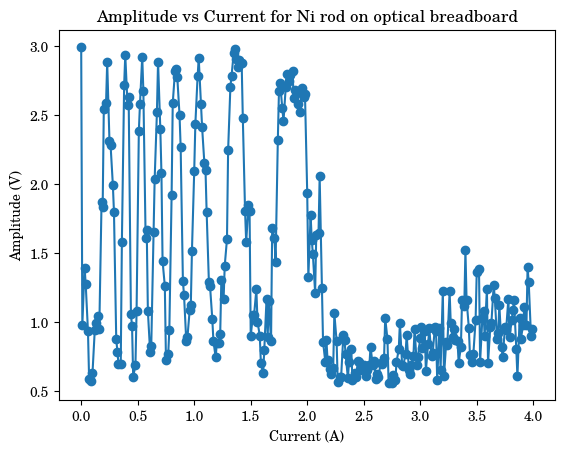

In [18]:
plt.plot(data[:, 1], data[:, 2], '-o')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['TeX Gyre Schola']
plt.xlabel('Current (A)')
plt.ylabel('Amplitude (V)')
plt.title('Amplitude vs Current for Ni rod on optical breadboard')
plt.savefig('ob-Ni-0.png', dpi=1200, bbox_inches='tight')
plt.show()

# Fe (optical breadboard)

9
[2.21258741e-06 2.76573427e-06 3.31888112e-06 2.76573427e-06
 2.21258741e-06 1.65944056e-06 1.10629371e-06 5.53146853e-07
 0.00000000e+00] [3860.13986014 3902.0979021  4111.88811189 4153.84615385 4279.72027972
 4363.63636364 4405.59440559 4489.51048951 4531.46853147]


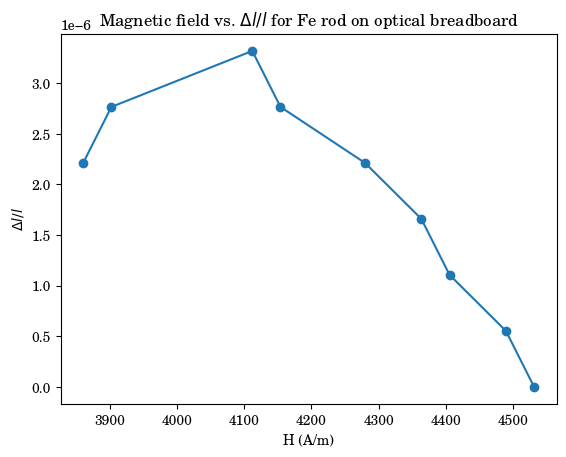

In [19]:
df = pd.read_excel('/home/peakcipher/Documents/NISER/8. 2023 Spring/P442 Integrated Physics Lab II/p442-integrated-lab/III. Magnetostriction/data/ob-Fe.xlsx')
data = df.to_numpy()
#print(data)
# Create a random numpy array
x_min = 0.45
x_max = 0.55
mask = (data[:, 1] >= x_min) & (data[:, 1] <= x_max)


# Number of coils
N = 1200

# length of rods
l_NI = 14.3*1e-2 # m
l_Fe = 14.27*1e-2 # m
l_Cu = 14.2*1e-2 # m



# Find all local maxima
max_indices, _ = find_peaks(data[:, 2][mask])

# Find all local minima
min_indices, _ = find_peaks(-data[:, 2][mask])

# Adjust the indices to account for the x-limits
max_indices = np.where(mask)[0][max_indices]
min_indices = np.where(mask)[0][min_indices]

# Extracting x_values (current)
x_max_values = data[max_indices, 1]
x_min_values = data[min_indices, 1]
x_values = np.concatenate((x_max_values, x_min_values))
current_values = np.sort(x_values)
print(len(current_values))
# n values
ap_values = np.array([2.0, 2.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5, 0.0])

# delta_l values
delta_l = ap_values*632.8/4*1e-9

# magnetic field values (H)
H_values = N*current_values/l_NI

# delta_l/l values
delta_l_l = delta_l/l_NI
print(delta_l_l, H_values)
# Plotting
plt.plot(H_values, delta_l_l, '-o')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['TeX Gyre Schola']
plt.xlabel('H (A/m)')
plt.ylabel('$\Delta l/l$')
plt.title('Magnetic field vs. $\Delta l/l$ for Fe rod on optical breadboard')
plt.savefig('ob-Fe-1.png', dpi=1200, bbox_inches='tight')
plt.show()

In [20]:
data_write = {'Current Values': current_values,
           'Ring changes': ap_values,
           'Delta l': delta_l,
           'H': H_values,
           'Delta l/l': delta_l_l}

df_write = pd.DataFrame(data_write)

# Stack the arrays horizontally
writer = pd.ExcelWriter('ob-Fe-tab.xlsx', engine='xlsxwriter')
df_write.to_excel(writer, sheet_name='Sheet1', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

/tmp/ipykernel_23427/3845590378.py:14: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


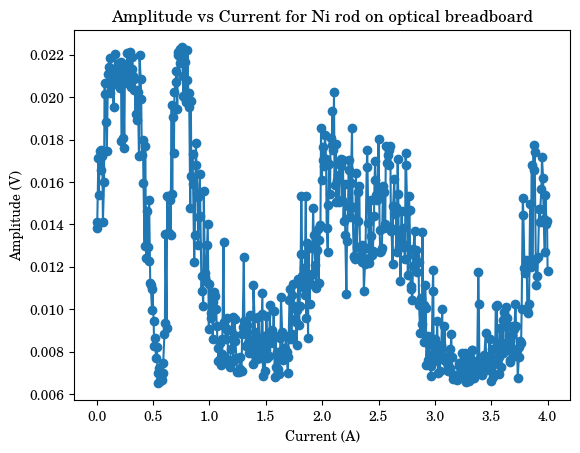

In [21]:
plt.plot(data[:, 1], data[:, 2], '-o')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['TeX Gyre Schola']
plt.xlabel('Current (A)')
plt.ylabel('Amplitude (V)')
plt.title('Amplitude vs Current for Ni rod on optical breadboard')
plt.savefig('ob-Fe-0.png', dpi=1200, bbox_inches='tight')
plt.show()